In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
get_ipython().run_line_magic('matplotlib', 'inline')
import re
import string

In [3]:
data=pd.read_csv("Elon_musk.csv",encoding='unicode_escape',error_bad_lines=False) 
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
d1 = data.iloc[:,1]
d1

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [5]:
def cleanTxt(text):
    text = re.sub(r'\\u[A-Za-z0-9]+','',text)
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    text = re.sub('[0-9]', '', text)
    text = re.sub(r'\s+',' ', text)
    text = re.sub('[_AA_]','',text)
    text = re.sub('[<U+F>]','',text)
    text = re.sub('[&]','',text)
    text = re.sub('[;,?]','',text)
    return text

In [6]:
d2 = d1.apply(cleanTxt)
d2

0                                            Im an alien
1       Carmack Ray tracing on Cyberpunk with HDR is n...
2                                        Great interview!
3                                  Doge is underestimated
4        Congratulations Tesla China for amazing execu...
                              ...                        
1994     True it sounds so surreal but the negative pr...
1995     Make sure to read ur terms amp conditions bef...
1996                                       Samwise Gamgee
1997                             ltho Dumb and Dumber is 
1998                               Progress update ugust 
Name: Text, Length: 1999, dtype: object

In [7]:
d3 = d2.str.translate(str.maketrans('', '', string.punctuation))
d3

0                                            Im an alien
1       Carmack Ray tracing on Cyberpunk with HDR is n...
2                                         Great interview
3                                  Doge is underestimated
4        Congratulations Tesla China for amazing execu...
                              ...                        
1994     True it sounds so surreal but the negative pr...
1995     Make sure to read ur terms amp conditions bef...
1996                                       Samwise Gamgee
1997                             ltho Dumb and Dumber is 
1998                               Progress update ugust 
Name: Text, Length: 1999, dtype: object

In [8]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(str(d3))
print(text_tokens[0:50]) 

['0', 'I\x92m', 'an', 'alien', '1', 'Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'n', '...', '2', 'Great', 'interview', '3', 'Doge', 'is', 'underestimated', '4', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execu', '...', '...', '1994', 'True', 'it', 'sounds', 'so', 'surreal', 'but', 'the', 'negative', 'pr', '...', '1995', 'Make', 'sure', 'to', 'read', 'ur', 'terms', 'amp']


In [9]:
len(text_tokens) 

77

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['0', 'I\x92m', 'alien', '1', 'Carmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'n', '...', '2', 'Great', 'interview', '3', 'Doge', 'underestimated', '4', 'Congratulations', 'Tesla', 'China', 'amazing', 'execu', '...', '...', '1994', 'True', 'sounds', 'surreal', 'negative', 'pr', '...', '1995', 'Make', 'sure', 'read', 'ur', 'terms', 'amp', 'conditions']


In [12]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25]) 

['0', 'i\x92m', 'alien', '1', 'carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'n', '...', '2', 'great', 'interview', '3', 'doge', 'underestimated', '4', 'congratulations', 'tesla', 'china', 'amazing', 'execu', '...', '...']


In [13]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40]) 

['0', 'i\x92m', 'alien', '1', 'carmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'n', '...', '2', 'great', 'interview', '3', 'doge', 'underestim', '4', 'congratul', 'tesla', 'china', 'amaz', 'execu', '...', '...', '1994', 'true', 'sound', 'surreal', 'neg', 'pr', '...', '1995', 'make', 'sure', 'read', 'ur', 'term', 'amp', 'condit']


In [14]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')  

In [15]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40]) 

0 Im alien 1 Carmack Ray tracing Cyberpunk HDR n ... 2 Great interview 3 Doge underestimated 4 Congratulations Tesla China amazing execu ... ... 1994 True sounds surreal negative pr ... 1995 Make sure read ur terms amp conditions


In [16]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['0', 'I\x92m', 'alien', '1', 'Carmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'n', '...', '2', 'great', 'interview', '3', 'Doge', 'underestimate', '4', 'Congratulations', 'Tesla', 'China', 'amazing', 'execu', '...', '...']


# Feature Extraction

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(lemmas) 

In [20]:
print(vectorizer.vocabulary_)

{'alien': 6, 'carmack': 10, 'ray': 32, 'trace': 41, 'cyberpunk': 14, 'hdr': 22, 'great': 21, 'interview': 23, 'doge': 15, 'underestimate': 44, 'congratulations': 13, 'tesla': 39, 'china': 11, 'amazing': 7, 'execu': 19, '1994': 0, 'true': 42, 'sound': 35, 'surreal': 37, 'negative': 28, 'pr': 30, '1995': 1, 'make': 26, 'sure': 36, 'read': 33, 'ur': 46, 'term': 38, 'amp': 8, 'condition': 12, 'bef': 9, '1996': 2, 'samwise': 34, 'gamgee': 20, '1997': 3, 'ltho': 25, 'dumb': 17, 'dumber': 18, '1998': 4, 'progress': 31, 'update': 45, 'ugust': 43, 'name': 27, 'text': 40, 'length': 24, '1999': 5, 'dtype': 16, 'object': 29}


In [21]:
print(vectorizer.get_feature_names()[50:100])
print(x.toarray()[50:100]) 

[]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0

In [23]:
print(x.toarray().shape)

(64, 47)


In [24]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(d3) 

In [25]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'alcon', 'all', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'carmack', 'crew', 'do', 'dragon', 'enough', 'feed', 'first', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'if', 'in', 'in the', 'is', 'it', 'just', 'launch', 'like', 'make', 'maybe', 'model', 'more', 'most', 'much', 'my', 'need', 'new', 'next', 'no', 'not', 'now', 'of', 'of the', 'on', 'one', 'only', 'or', 'our', 'out', 'people', 'probably', 'production', 're', 'rt', 'should', 'sn', 'so', 'some', 'soon', 'spacex', 'starship', 'station', 'still', 'sure', 'tesla', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'to be', 'to the', 'too', 'true', 'very', 'was', 'we', 'we re', 'what', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you', 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(d3)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['about', 'accurate', 'actually', 'ago', 'air', 'alcon', 'alcon first', 'alcon first stage', 'all', 'almost', 'also', 'although', 'amazing', 'amp', 'an', 'and', 'and doug', 'any', 'appreciated', 'are', 'around', 'as', 'astronauts', 'at', 'at tesla', 'awesome', 'back', 'bad', 'bar', 'bassd', 'battery', 'be', 'be great', 'because', 'been', 'before', 'being', 'berlin', 'best', 'beta', 'better', 'between', 'bickett', 'big', 'bit', 'boca', 'body', 'booster', 'both', 'bsolutely', 'build', 'but', 'but it', 'but we', 'by', 'can', 'can be', 'car', 'cargo', 'carmack', 'cars', 'close', 'cold', 'com', 'come', 'coming', 'coming soon', 'companies', 'completed', 'confirmed', 'congratulations', 'control', 'cool', 'cost', 'could', 'course', 'course still', 'course still love', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'didn', 'difference', 'different', 'do', 'does', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'doug', 'down', 'dragon', 'droneship', 'early', 'earth

In [27]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

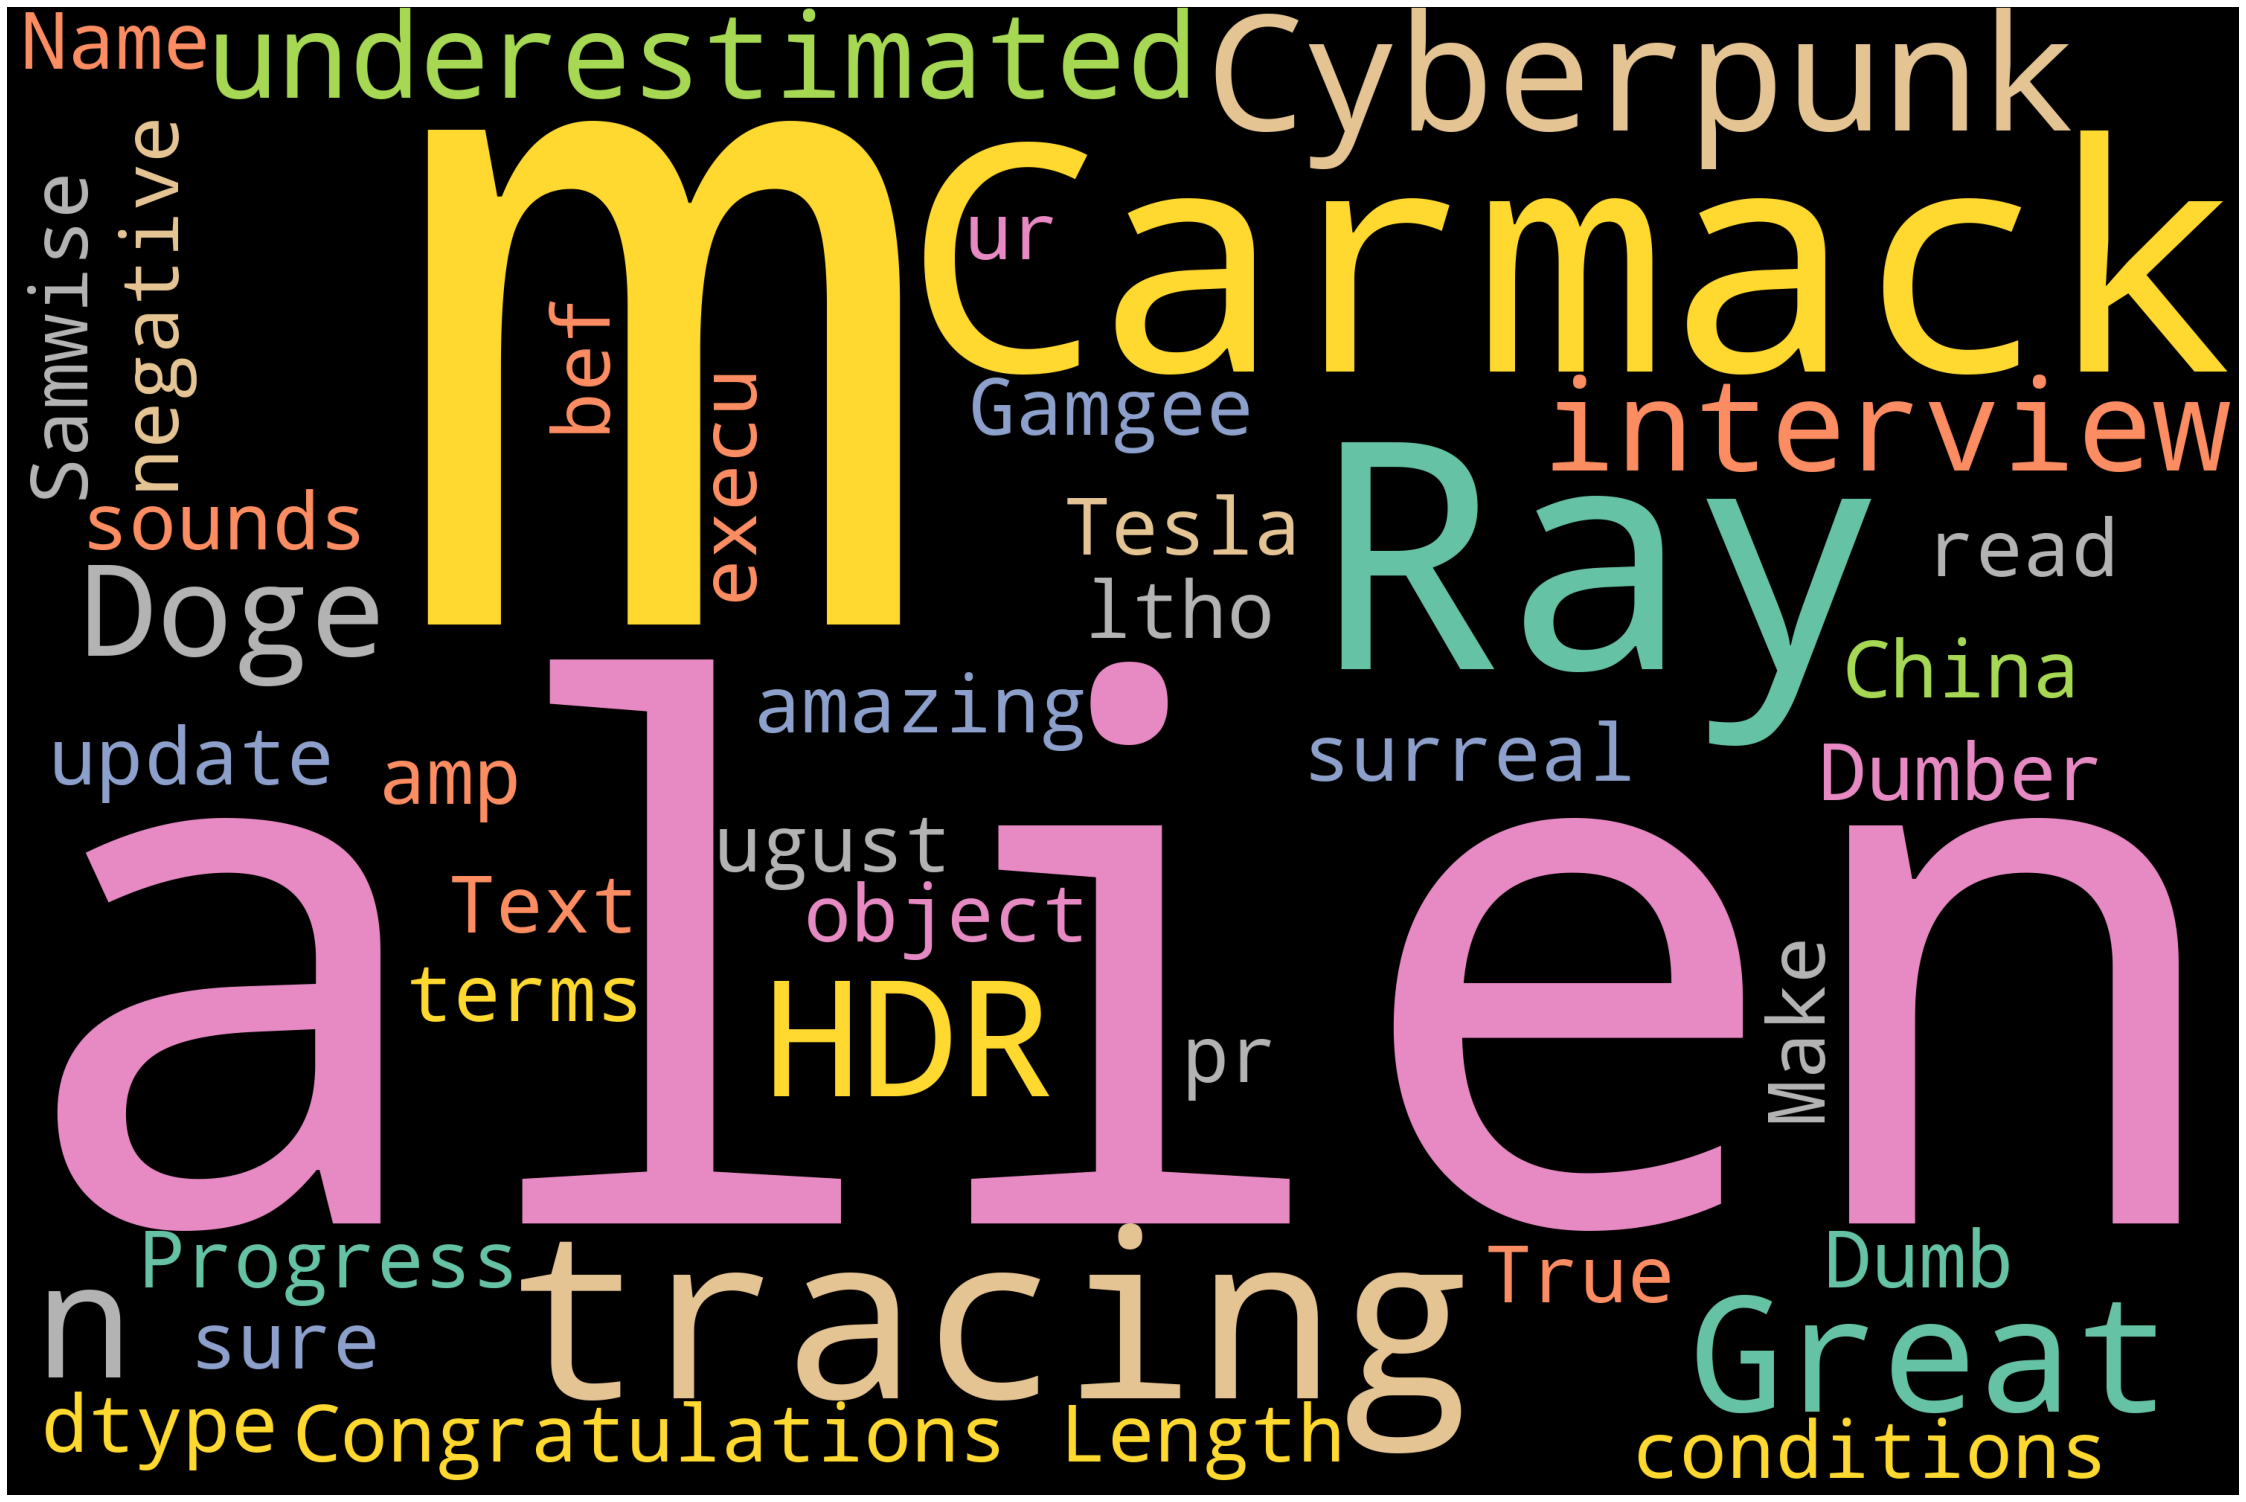

In [28]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(str(d3))
# Plot
plot_cloud(wordcloud)